In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


import numpy as np
import pandas as pd
import random

import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
%matplotlib inline


from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from math import sqrt
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn import preprocessing

from sklearn.decomposition import PCA
from datetime import datetime

In [2]:
#retrieve Data
mnist = fetch_openml('mnist_784', version = 1)


In [3]:
#splitting mnist Data
X, y = mnist["data"], mnist["target"]
X.shape
X_train= X[:60000,:]
x_test = X[60000:70000,:]
y_train = y[:60000]
y_test = y[60000:70000]

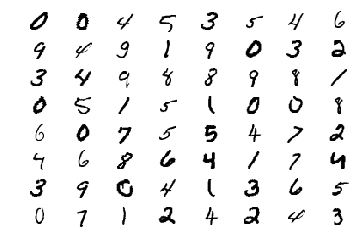

<Figure size 432x288 with 0 Axes>

In [4]:
#initial inspection of Data
for i in range(1,65):
    ax = plt.subplot(8,8,i)
    some_digit= X_train[(random.randint(1,784))]
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    i= i + 1
plt.show()
plt.savefig('digits.pdf')

# RANDOM FOREST CLASSIFIER

In [5]:
rf = RandomForestClassifier(max_features = 'sqrt', bootstrap = True, n_jobs = -1, n_estimators = 10)


In [7]:
#Predicting with random forest and tracking time to fit and predict
from datetime import datetime
rf_start_time = datetime.now()

rf.fit(X_train, y_train)
y_pred = rf.predict(x_test)

rf_end_time = datetime.now()
print('The time it took to run this Random Forest model is : {}'.format(rf_end_time - rf_start_time))

The time it took to run this Random Forest model is : 0:00:01.855815


In [8]:


# Displaying F1 scores
rf_f1 = f1_score(y_test, y_pred, average = 'weighted')
print('The f1 score for Random Forest is {0:.2%}'.format(rf_f1))

The f1 score for Random Forest is 94.74%


# PRINCIPAL COMPONENTS ANALYSIS

In [9]:
pca = PCA(n_components=.95)

In [10]:
#fitting pca and identifying number of components to reach 95% of variance explanation

pca_start_time = datetime.now()
x_pca = pca.fit_transform(X)

pca_end_time = datetime.now()
print('The time it took to run this pca is : {}'.format(pca_end_time - pca_start_time))


The time it took to run this pca is : 0:00:07.371443


In [11]:

variance = pca.explained_variance_ratio_
var= np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print('The number of principal components  that explains 95% of variability is {}'.format(var.shape[0]))

The number of principal components  that explains 95% of variability is 154


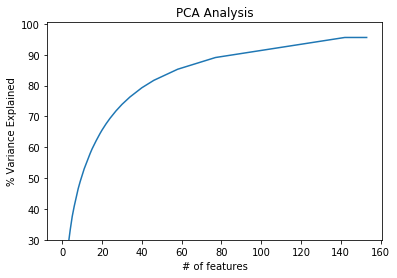

In [12]:
#Visual
plt.ylabel('% Variance Explained')
plt.xlabel('# of features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)
plt.savefig('chart.pdf')

# RE-RUNNING RANDOM FOREST WITH PRINCIPAL COMPONENTS

In [13]:
X_train_pca = x_pca[:60000,:]
X_test_pca = x_pca[60000:70000,:]





In [14]:
rf_pca = RandomForestClassifier(max_features = 'sqrt', bootstrap = True, n_jobs = -1, n_estimators = 10)

In [15]:
rf_pca_start_time = datetime.now()
rf_pca.fit(X_train_pca, y_train)
y_predict_pca = rf_pca.predict(X_test_pca)

rf_pca_end_time = datetime.now()
print('The time it took to run this random forest with the pca is : {}'.format(rf_pca_end_time - rf_pca_start_time))


The time it took to run this random forest with the pca is : 0:00:03.928212


In [16]:
pca_rf_f1 = f1_score(y_test, y_predict_pca, average = 'weighted')
print('The f1 score for Random Forest with PCA is {0:.2%}'.format(pca_rf_f1))

The f1 score for Random Forest with PCA is 89.14%


In [17]:
print(rf_f1)
print(pca_rf_f1)
print(rf_end_time - rf_start_time)
print(pca_end_time - pca_start_time)
print(rf_pca_end_time - rf_pca_start_time)


0.9474412756268119
0.8914328353295641
0:00:01.855815
0:00:07.371443
0:00:03.928212


In [18]:
#Data = [{'model':['random', 'pca', 'rf,pca']},{'Score':[rf_f1, 'NA',pca_rf_f1]}, {'Time':[rf_end_time - rf_start_time,pca_end_time - pca_start_time,rf_pca_end_time - rf_pca_start_time]}]

In [19]:
#fitting pca and identifying number of components to reach 95% of variance explanation

pca_start_time = datetime.now()
x_pca_train = pca.fit_transform(X[:60000,:])
x_pca_test = pca.transform(X[60000:70000,:])

pca_end_time = datetime.now()
print('The time it took to run this pca is : {}'.format(pca_end_time - pca_start_time))

The time it took to run this pca is : 0:00:05.132037


In [20]:
pca_start_time = datetime.now()
rf_pca.fit(x_pca_train, y_train)
y_predict_pca_train = rf_pca.predict(x_pca_test)

pca_end_time = datetime.now()
print('The time it took to run this pca is : {}'.format(pca_end_time - pca_start_time))

The time it took to run this pca is : 0:00:05.441303


In [21]:
pca_rf_f1_train = f1_score(y_test, y_predict_pca_train, average = 'weighted')

In [22]:
pca_rf_f1_train

0.8995153248804325